<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/6_cornernet_lite/Example%20-%20Tiger%20detection%20using%20Cornernet-Saccade%20(No%20Val%20Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/6_cornernet_lite/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh
     - ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/6_cornernet_lite/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime for installations to get initiated

# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/6_cornernet_lite/installation && chmod +x install.sh && ./install.sh

# About the network

1. Paper on CornerNet: https://arxiv.org/abs/1808.01244

2. Paper on CornerNet-Lite: https://arxiv.org/abs/1904.08900

3. Blog 1 on CornerNet: https://joshua19881228.github.io/2019-01-20-CornerNet/

4. Blog 2 on CornerNet: https://zhangtemplar.github.io/anchor-free-detection/

5. Blog 3 on CornerNet: https://opencv.org/latest-trends-of-object-detection-from-cornernet-to-centernet-explained-part-i-cornernet/

6. Blog 4 on CornerNet: https://towardsdatascience.com/centernet-keypoint-triplets-for-object-detection-review-a314a8e4d4b0

7. Blog 5 on CornerNet: https://medium.com/@andersasac/the-end-of-anchors-improving-object-detection-models-and-annotations-73828c7b39f6

# COCO Format - 1

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------ship (coco_dir) 
          |         |
          |         |----images (img_dir)
          |                |
          |                |------Train (set_dir) (Train)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "ship";
 - img_dir = "images";
 - set_dir = "Train";

 
 Note: Annotation file name too coincides against the set_dir

# COCO Format - 2

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------ship (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "ship";
 - img_dir = "./";
 - set_dir = "ImagesTrain";

 
 Note: Annotation file name too coincides against the set_dir
 

# Dataset

  - Credits - https://storage.googleapis.com/openimages/web/index.html
  
  - Collected using - https://github.com/EscVM/OIDv4_ToolKit
  
       - Command used to collect (inside OIDv4_ToolKit)
         - python main.py downloader --classes Apple Orange --type_csv validation
         
  - Converted the dataset to COCO format

In [2]:
#Download dataset

In [5]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1egk8XhrzteJ7tAWHZJc3OkTox1RMkA5b' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1egk8XhrzteJ7tAWHZJc3OkTox1RMkA5b" -O tiger.zip && rm -rf /tmp/cookies.txt

--2020-01-16 13:08:01--  https://docs.google.com/uc?export=download&id=1egk8XhrzteJ7tAWHZJc3OkTox1RMkA5b
Resolving docs.google.com (docs.google.com)... 172.217.9.46, 2607:f8b0:4009:810::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.17K  --.-KB/s    in 0s      

2020-01-16 13:08:01 (55.3 MB/s) - written to stdout [3244]

--2020-01-16 13:08:01--  https://docs.google.com/uc?export=download&confirm=QvUt&id=1egk8XhrzteJ7tAWHZJc3OkTox1RMkA5b
Resolving docs.google.com (docs.google.com)... 172.217.9.46, 2607:f8b0:4009:810::200e
Connecting to docs.google.com (docs.google.com)|172.217.9.46|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/m1pjcl7utetukphbbakc8a6o4f3m5t6k/1579176

In [6]:
! unzip -q tiger.zip

In [1]:
import os
import sys

In [2]:
sys.path.append("Monk_Object_Detection/6_cornernet_lite/lib/")

In [3]:
from train_detector import Detector

In [4]:
gtf = Detector();

In [5]:
root_dir = "./";
coco_dir = "tiger"
img_dir = "/"
set_dir = "Images"

In [6]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=16, use_gpu=True, num_workers=4)

In [7]:
gtf.Model(model_name="CornerNet_Saccade")

In [8]:
gtf.Hyper_Params(lr=0.00025, total_iterations=10000)

In [9]:
gtf.Setup();

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading Model - core.models.CornerNet_Saccade
Model Loaded


In [10]:
gtf.Train();

start_iter       = 0
distributed      = False
world_size       = 0
initialize       = False
batch_size       = 16
learning_rate    = 0.00025
max_iteration    = 10000
stepsize         = 8000
snapshot         = 5000
val_iter         = 500
display          = 100
decay_rate       = 10
Process 0: building model...
total parameters: 116847521
start prefetching data...
start prefetching data...
shuffling indices...
start prefetching data...
shuffling indices...
start prefetching data...
shuffling indices...
shuffling indices...
setting learning rate to: 0.00025
training start...
Process 0: training loss at iteration 100: 5.511205673217773                    
Process 0: training loss at iteration 200: 7.852847099304199                    
  2%|▉                                    | 244/10000 [04:51<3:14:50,  1.20s/it]shuffling indices...
Process 0: training loss at iteration 300: 5.803357124328613                    
Process 0: training loss at iteration 400: 7.808919906616211                 

Process 0: training loss at iteration 6300: 3.9797048568725586                  
Process 0: training loss at iteration 6400: 2.0709328651428223                  
 65%|██████████████████████            | 6480/10000 [2:09:51<1:10:43,  1.21s/it]shuffling indices...
Process 0: training loss at iteration 6500: 2.5178704261779785                  
saving model to ./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_intermediate.pkl
Process 0: training loss at iteration 6600: 2.5057530403137207                  
Process 0: training loss at iteration 6700: 4.2873125076293945                  
 67%|██████████████████████▉           | 6740/10000 [2:15:07<1:05:45,  1.21s/it]shuffling indices...
Process 0: training loss at iteration 6800: 2.1620430946350098                  
Process 0: training loss at iteration 6900: 2.6860275268554688                  
 70%|███████████████████████▊          | 6999/10000 [2:20:20<1:00:31,  1.21s/it]shuffling indices...
Process 0: training loss at iteration 7000: 3.77

# Inference

In [1]:
import os
import sys
sys.path.append("../../6_cornernet_lite/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
class_list = ["Tiger"]
gtf.Model(class_list, 
          base="CornerNet_Saccade", 
          model_path="./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_final.pkl")

total parameters: 116847521
loading from ./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_final.pkl


/home/abhi/.virtualenvs/monk_obj_6_cornernet_lite/lib/python3.7/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


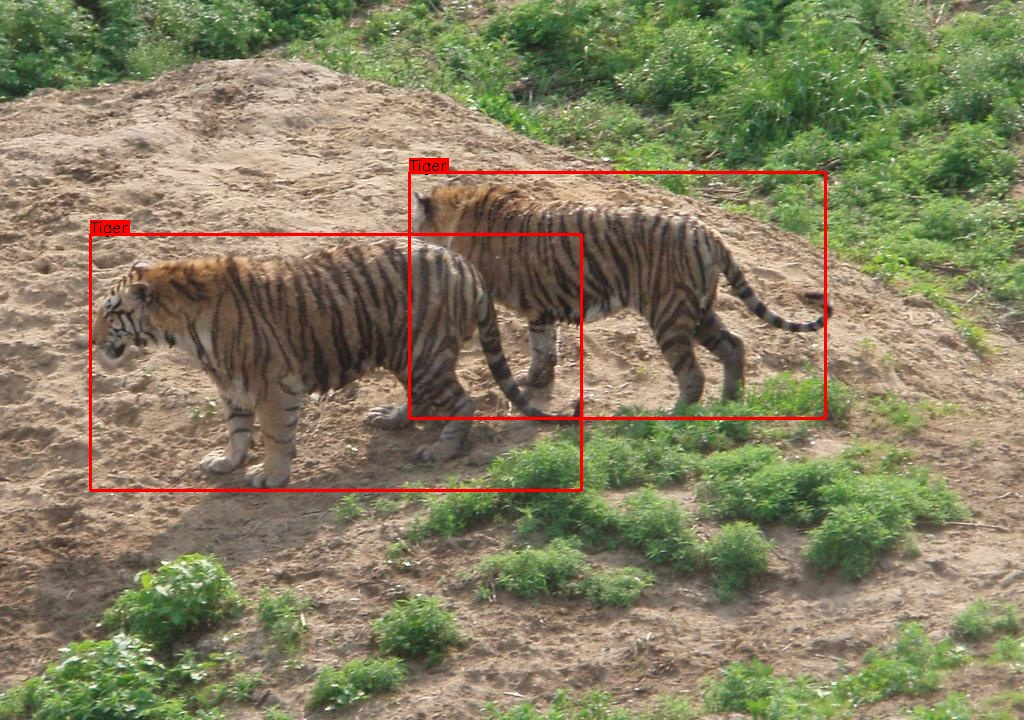

In [5]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img1.jpg", vis_thresh=0.7, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

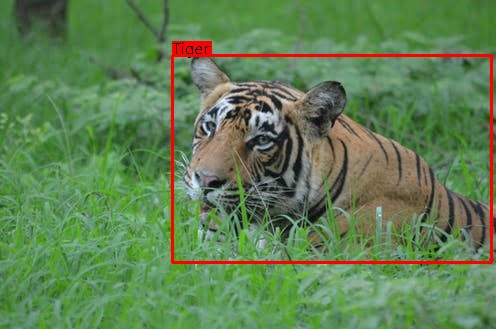

In [6]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img2.jpeg", vis_thresh=0.7, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

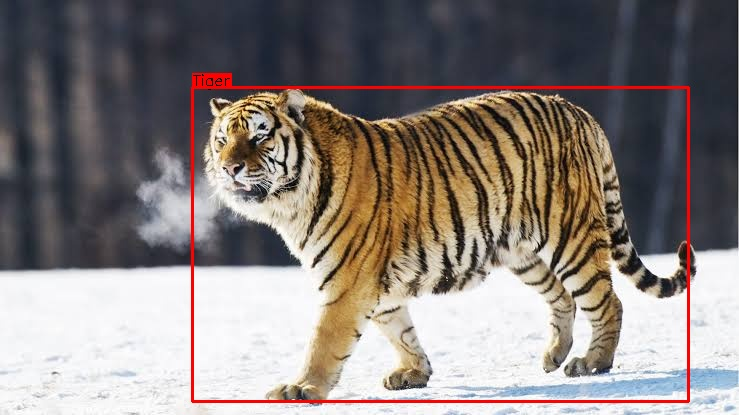

In [7]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img3.jpeg", vis_thresh=0.7, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

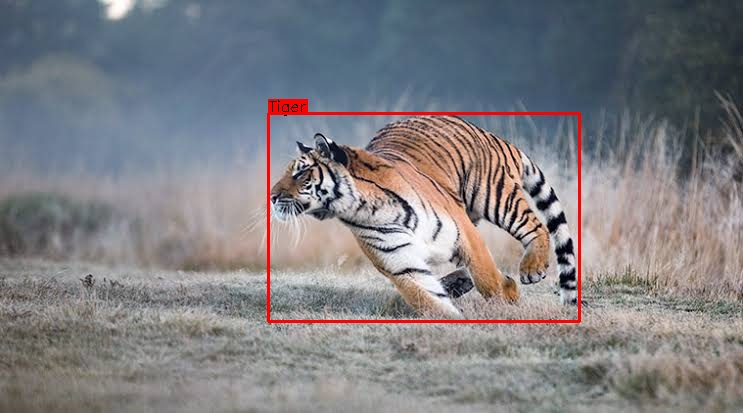

In [8]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img4.jpeg", vis_thresh=0.7, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

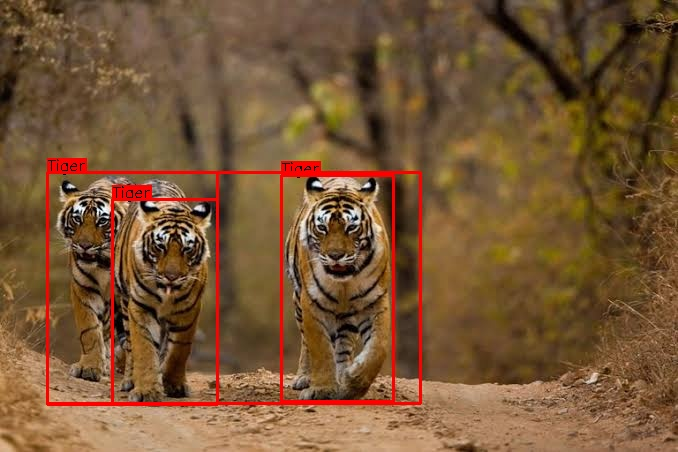

In [12]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img5.jpeg", vis_thresh=0.15, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

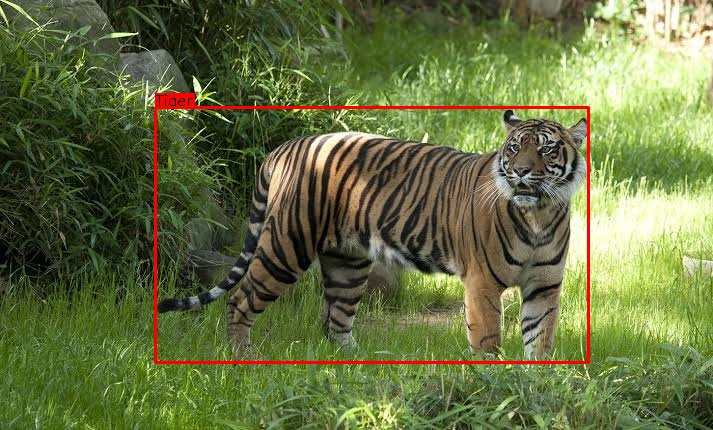

In [14]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img6.jpeg", vis_thresh=0.7, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

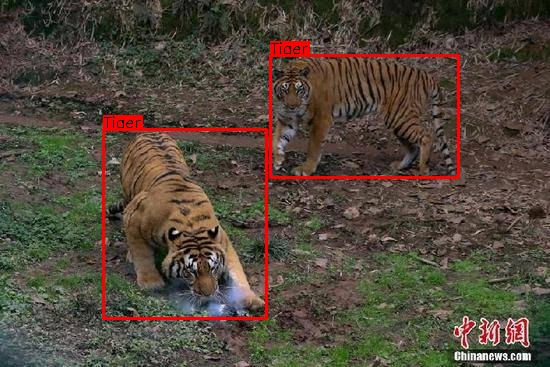

In [19]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img7.jpeg", vis_thresh=0.5, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

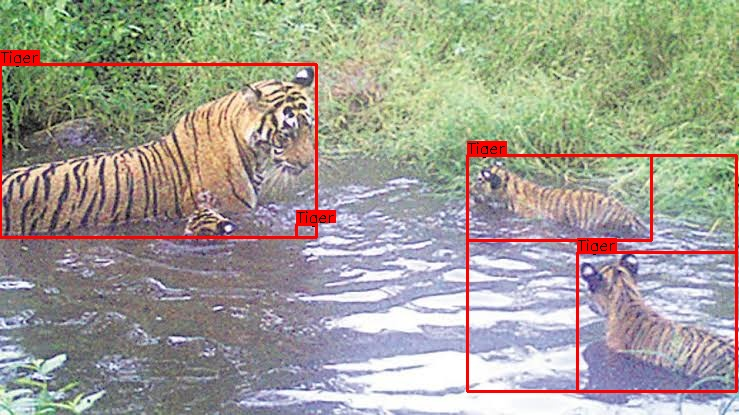

In [29]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img8.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

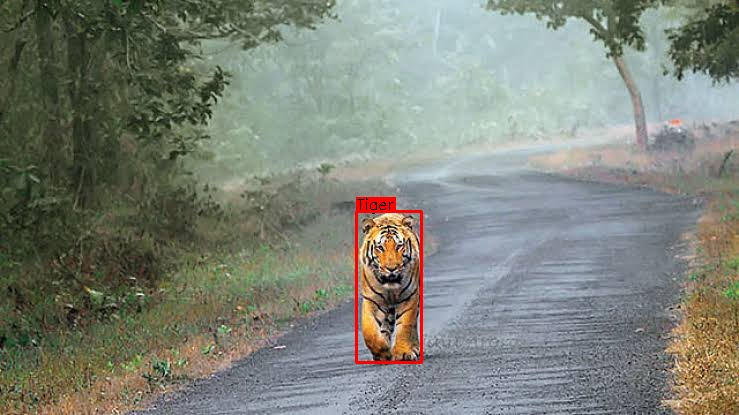

In [25]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img9.jpeg", vis_thresh=0.6, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

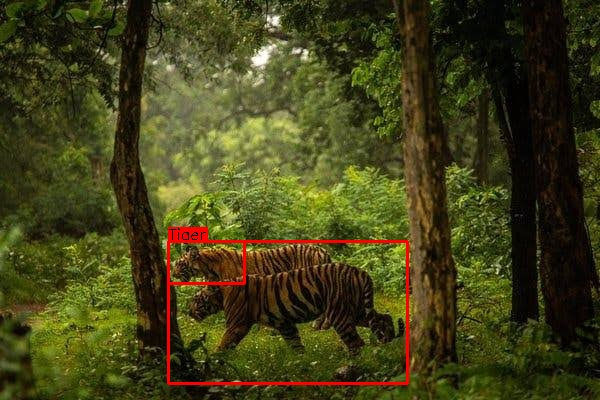

In [30]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img10.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

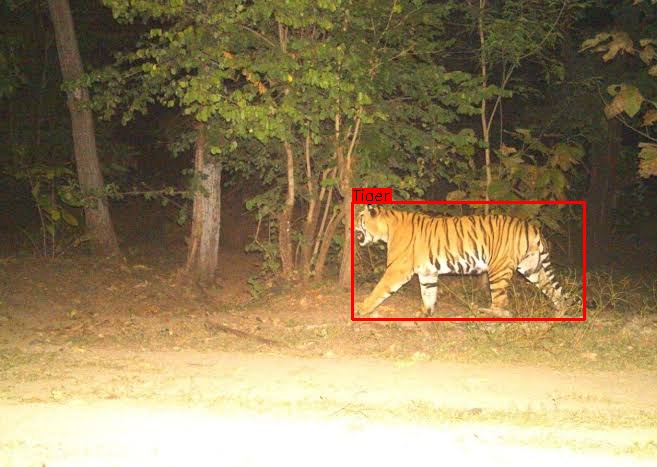

In [38]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img11.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

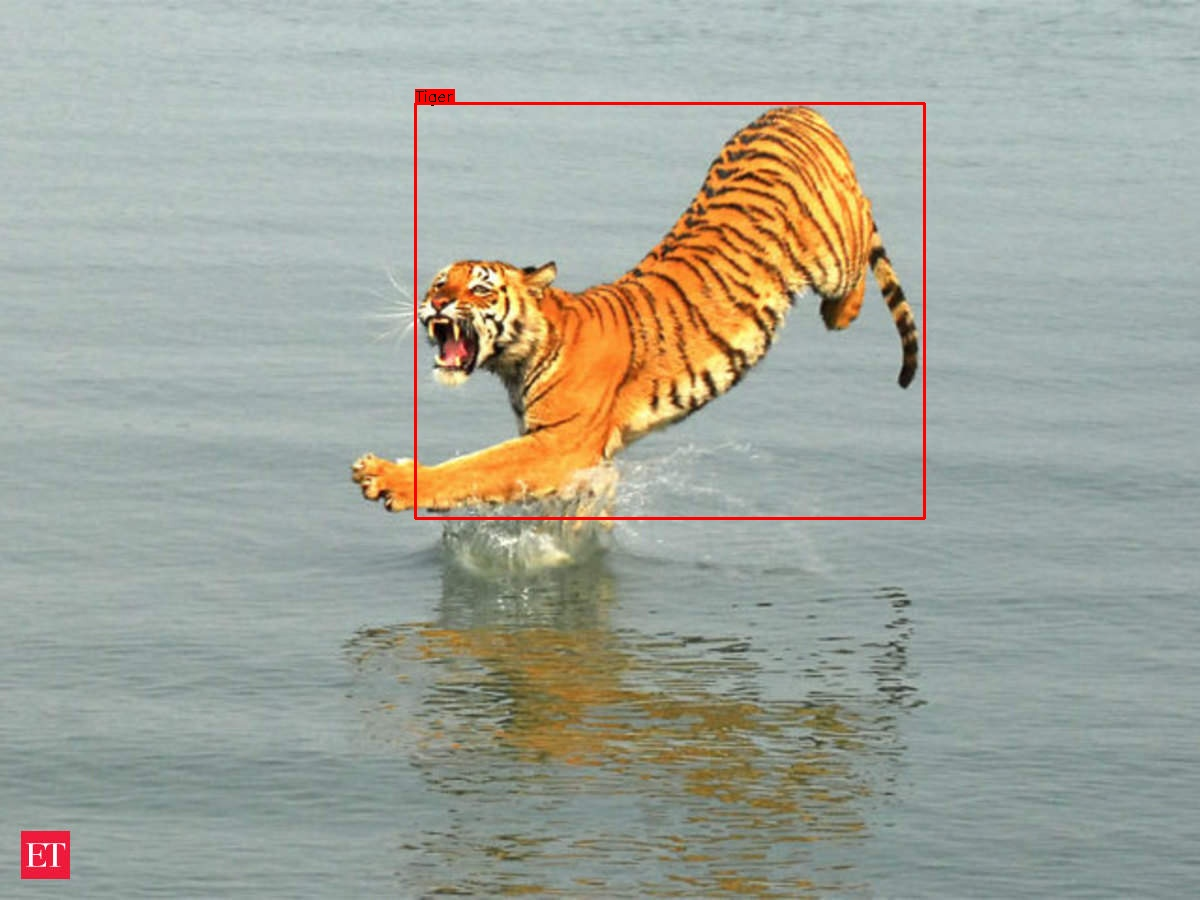

In [39]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img12.jpg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

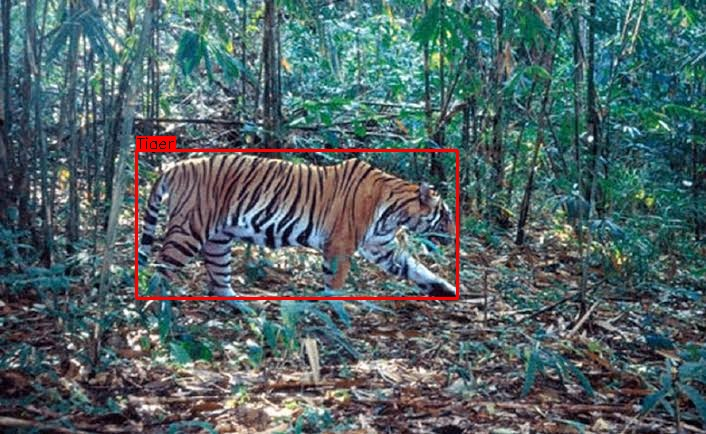

In [41]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img13.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

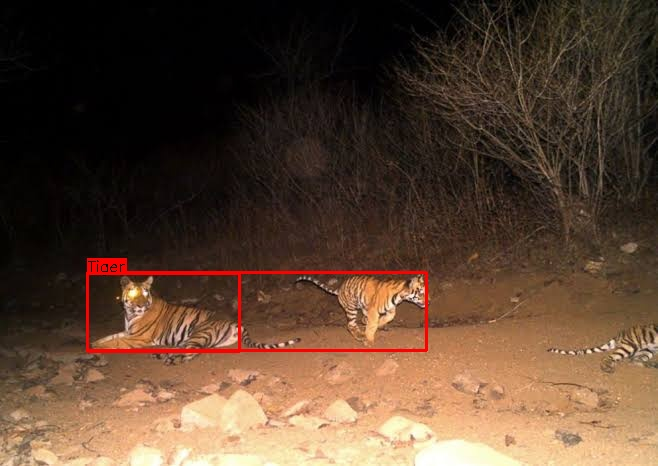

In [45]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img14.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

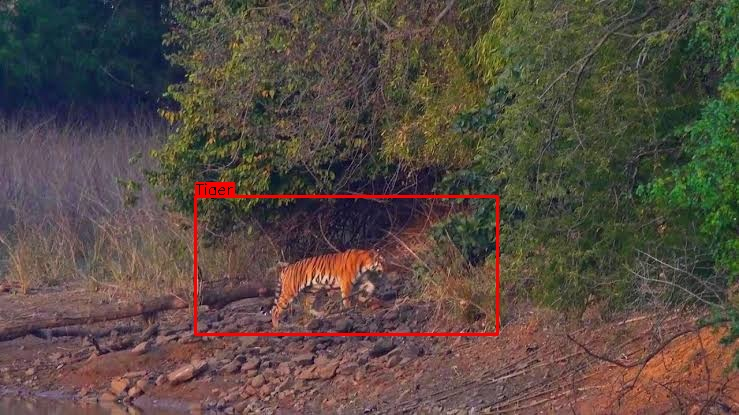

In [46]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img15.jpeg", vis_thresh=0.4, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

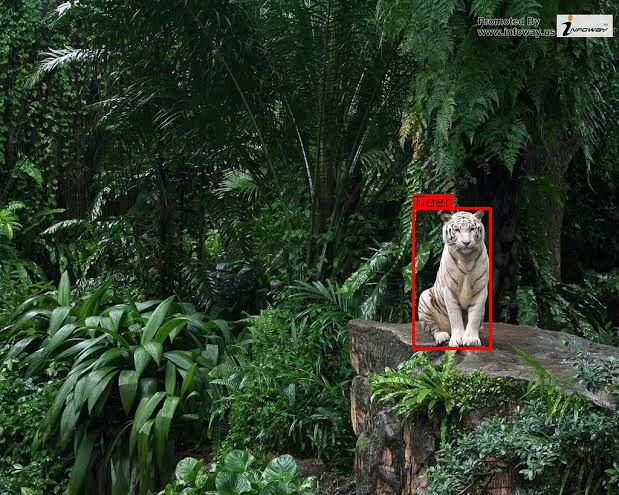

In [51]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img16.jpeg", vis_thresh=0.6, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

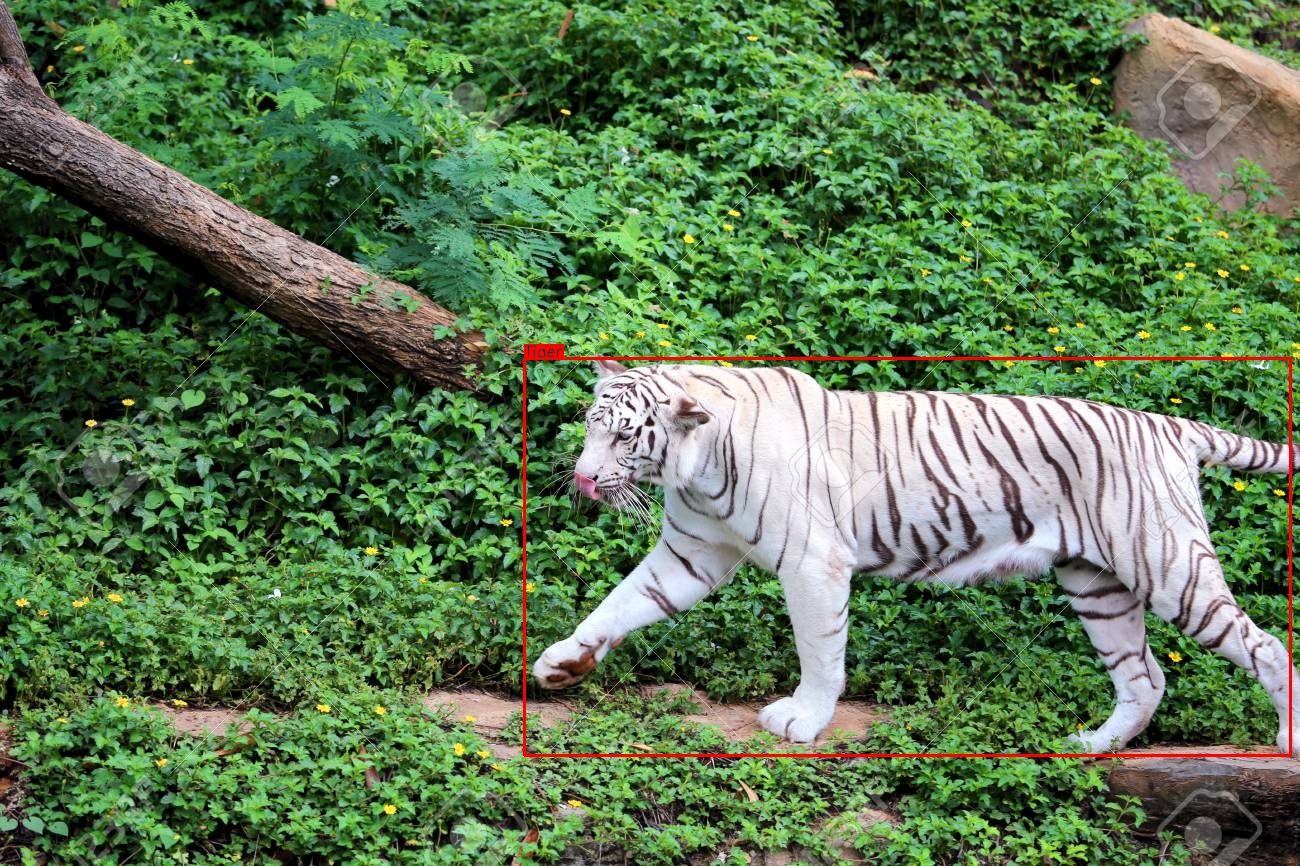

In [55]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img17.jpeg", vis_thresh=0.8, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

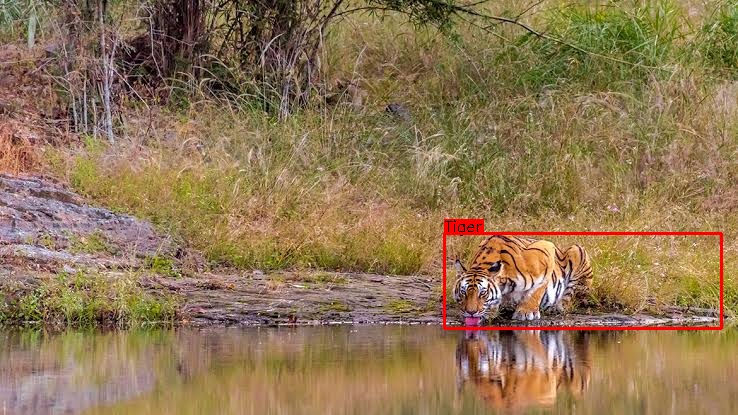

In [57]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img18.jpeg", vis_thresh=0.3, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

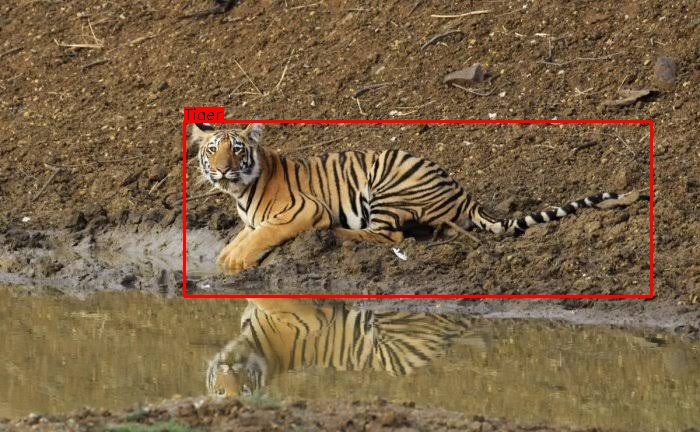

In [58]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img19.jpeg", vis_thresh=0.3, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

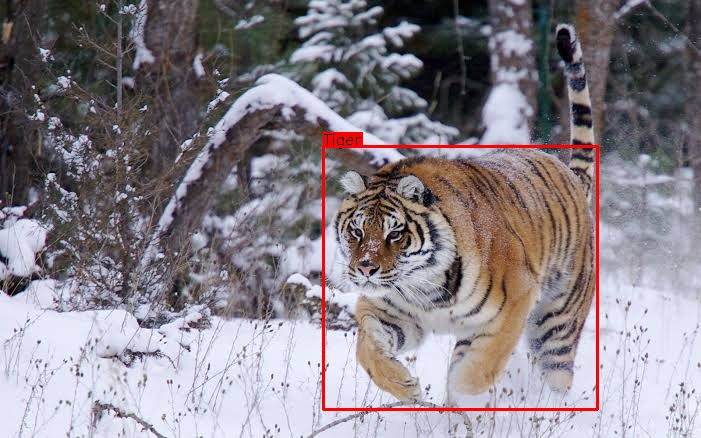

In [61]:
boxes = gtf.Predict("Monk_Object_Detection/example_notebooks/sample_dataset/tiger_test/img20.jpeg", vis_thresh=0.6, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')